In [1]:
from tensorflow.keras.datasets import imdb
from sklearn.model_selection import train_test_split

(train_input,train_target), (test_input,test_target)=imdb.load_data(num_words=500)
train_input,val_input,train_target,val_target=train_test_split(
    train_input,train_target,test_size=0.2,random_state=42
)

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [2]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
train_seq=pad_sequences(train_input,maxlen=100)
val_seq=pad_sequences(val_input,maxlen=100)


In [3]:
from tensorflow import keras
model=keras.Sequential()
model.add(keras.layers.Embedding(500,16,input_length=100))
model.add(keras.layers.LSTM(8))
model.add(keras.layers.Dense(1,activation='sigmoid'))


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [4]:
rmsprop=keras.optimizers.RMSprop(learning_rate=1e-4)
model.compile(optimizer=rmsprop,loss='binary_crossentropy',metrics=['accuracy'])
checkpoint_cb=keras.callbacks.ModelCheckpoint('best-lstm-model.h5')
early_stopping_cb=keras.callbacks.EarlyStopping(patience=3,restore_best_weights=True)
history=model.fit(train_seq,train_target,epochs=100,batch_size=64,
                  validation_data=(val_seq,val_target),
                  callbacks=[checkpoint_cb,early_stopping_cb])

Epoch 1/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - accuracy: 0.5005 - loss: 0.6931

313/313 ━━━━━━━━━━━━━━━━━━━━ 20s 55ms/step - accuracy: 0.5006 - loss: 0.6931 - val_accuracy: 0.5462 - val_loss: 0.6926
Epoch 2/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - accuracy: 0.5600 - loss: 0.6924

313/313 ━━━━━━━━━━━━━━━━━━━━ 23s 63ms/step - accuracy: 0.5600 - loss: 0.6924 - val_accuracy: 0.5946 - val_loss: 0.6915
Epoch 3/100
312/313 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - accuracy: 0.6109 - loss: 0.6907

313/313 ━━━━━━━━━━━━━━━━━━━━ 17s 55ms/step - accuracy: 0.6109 - loss: 0.6907 - val_accuracy: 0.6290 - val_loss: 0.6888
Epoch 4/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.6322 - loss: 0.6870

313/313 ━━━━━━━━━━━━━━━━━━━━ 19s 49ms/step - accuracy: 0.6322 - loss: 0.6870 - val_accuracy: 0.6648 - val_loss: 0.6804
Epoch 5/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.6704 - loss: 0.6730

313/313 ━━━━━━━━━━━━━━━━━━━━ 16s 50ms/step - accuracy: 0.6704 - loss: 0.6730 - val_accuracy: 0.6952 - val_loss: 0.6342
Epoch 6/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - accuracy: 0.7012 - loss: 0.6245

313/313 ━━━━━━━━━━━━━━━━━━━━ 20s 62ms/step - accuracy: 0.7012 - loss: 0.6245 - val_accuracy: 0.7086 - val_loss: 0.6062
Epoch 7/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - accuracy: 0.7209 - loss: 0.5969

313/313 ━━━━━━━━━━━━━━━━━━━━ 19s 60ms/step - accuracy: 0.7209 - loss: 0.5969 - val_accuracy: 0.7278 - val_loss: 0.5868
Epoch 8/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - accuracy: 0.7370 - loss: 0.5795

313/313 ━━━━━━━━━━━━━━━━━━━━ 20s 58ms/step - accuracy: 0.7370 - loss: 0.5795 - val_accuracy: 0.7416 - val_loss: 0.5703
Epoch 9/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - accuracy: 0.7516 - loss: 0.5609

313/313 ━━━━━━━━━━━━━━━━━━━━ 21s 60ms/step - accuracy: 0.7516 - loss: 0.5609 - val_accuracy: 0.7444 - val_loss: 0.5560
Epoch 10/100
312/313 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - accuracy: 0.7629 - loss: 0.5483

313/313 ━━━━━━━━━━━━━━━━━━━━ 20s 57ms/step - accuracy: 0.7629 - loss: 0.5482 - val_accuracy: 0.7602 - val_loss: 0.5420
Epoch 11/100
312/313 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.7736 - loss: 0.5295

313/313 ━━━━━━━━━━━━━━━━━━━━ 15s 47ms/step - accuracy: 0.7736 - loss: 0.5294 - val_accuracy: 0.7682 - val_loss: 0.5270
Epoch 12/100
312/313 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.7801 - loss: 0.5135

313/313 ━━━━━━━━━━━━━━━━━━━━ 15s 49ms/step - accuracy: 0.7801 - loss: 0.5135 - val_accuracy: 0.7618 - val_loss: 0.5248
Epoch 13/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - accuracy: 0.7909 - loss: 0.4986

313/313 ━━━━━━━━━━━━━━━━━━━━ 18s 58ms/step - accuracy: 0.7909 - loss: 0.4986 - val_accuracy: 0.7770 - val_loss: 0.5034
Epoch 14/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - accuracy: 0.7893 - loss: 0.4918

313/313 ━━━━━━━━━━━━━━━━━━━━ 22s 63ms/step - accuracy: 0.7893 - loss: 0.4918 - val_accuracy: 0.7758 - val_loss: 0.4958
Epoch 15/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - accuracy: 0.7901 - loss: 0.4826

313/313 ━━━━━━━━━━━━━━━━━━━━ 18s 56ms/step - accuracy: 0.7901 - loss: 0.4826 - val_accuracy: 0.7832 - val_loss: 0.4840
Epoch 16/100
312/313 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.7981 - loss: 0.4690

313/313 ━━━━━━━━━━━━━━━━━━━━ 13s 42ms/step - accuracy: 0.7981 - loss: 0.4690 - val_accuracy: 0.7840 - val_loss: 0.4828
Epoch 17/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.8029 - loss: 0.4592

313/313 ━━━━━━━━━━━━━━━━━━━━ 20s 41ms/step - accuracy: 0.8029 - loss: 0.4592 - val_accuracy: 0.7898 - val_loss: 0.4685
Epoch 18/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.8058 - loss: 0.4519

313/313 ━━━━━━━━━━━━━━━━━━━━ 15s 48ms/step - accuracy: 0.8058 - loss: 0.4519 - val_accuracy: 0.7896 - val_loss: 0.4668
Epoch 19/100
312/313 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 0.8008 - loss: 0.4515

313/313 ━━━━━━━━━━━━━━━━━━━━ 16s 51ms/step - accuracy: 0.8008 - loss: 0.4515 - val_accuracy: 0.7910 - val_loss: 0.4579
Epoch 20/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - accuracy: 0.8033 - loss: 0.4447

313/313 ━━━━━━━━━━━━━━━━━━━━ 18s 57ms/step - accuracy: 0.8033 - loss: 0.4447 - val_accuracy: 0.7888 - val_loss: 0.4540
Epoch 21/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - accuracy: 0.8115 - loss: 0.4346

313/313 ━━━━━━━━━━━━━━━━━━━━ 18s 58ms/step - accuracy: 0.8115 - loss: 0.4346 - val_accuracy: 0.7922 - val_loss: 0.4526
Epoch 22/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - accuracy: 0.8091 - loss: 0.4337

313/313 ━━━━━━━━━━━━━━━━━━━━ 19s 60ms/step - accuracy: 0.8091 - loss: 0.4337 - val_accuracy: 0.7958 - val_loss: 0.4485
Epoch 23/100
312/313 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.8116 - loss: 0.4261

313/313 ━━━━━━━━━━━━━━━━━━━━ 17s 48ms/step - accuracy: 0.8116 - loss: 0.4261 - val_accuracy: 0.7938 - val_loss: 0.4446
Epoch 24/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.8093 - loss: 0.4313

313/313 ━━━━━━━━━━━━━━━━━━━━ 16s 49ms/step - accuracy: 0.8093 - loss: 0.4313 - val_accuracy: 0.7958 - val_loss: 0.4461
Epoch 25/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.8110 - loss: 0.4245

313/313 ━━━━━━━━━━━━━━━━━━━━ 17s 53ms/step - accuracy: 0.8110 - loss: 0.4245 - val_accuracy: 0.7970 - val_loss: 0.4414
Epoch 26/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - accuracy: 0.8097 - loss: 0.4252

313/313 ━━━━━━━━━━━━━━━━━━━━ 24s 64ms/step - accuracy: 0.8097 - loss: 0.4251 - val_accuracy: 0.7980 - val_loss: 0.4461
Epoch 27/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - accuracy: 0.8107 - loss: 0.4226

313/313 ━━━━━━━━━━━━━━━━━━━━ 17s 55ms/step - accuracy: 0.8108 - loss: 0.4226 - val_accuracy: 0.7772 - val_loss: 0.4644
Epoch 28/100
312/313 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - accuracy: 0.8141 - loss: 0.4173

313/313 ━━━━━━━━━━━━━━━━━━━━ 17s 55ms/step - accuracy: 0.8141 - loss: 0.4173 - val_accuracy: 0.7996 - val_loss: 0.4443


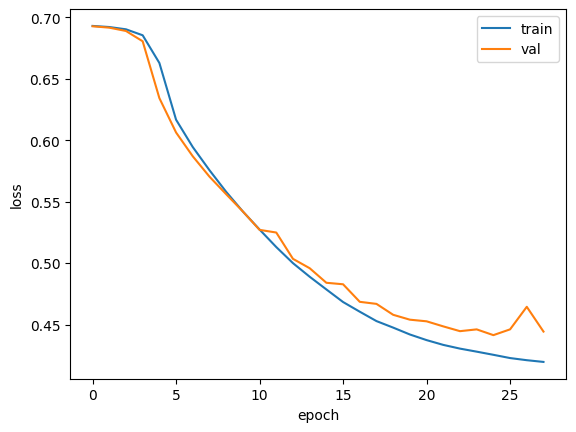

In [6]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()

In [7]:
model2=keras.Sequential()
model2.add(keras.layers.Embedding(500,16,input_length=100))
model2.add(keras.layers.LSTM(8,dropout=0.3))
model2.add(keras.layers.Dense(1,activation='sigmoid'))

rmsprop=keras.optimizers.RMSprop(learning_rate=1e-4)
model2.compile(optimizer=rmsprop,loss='binary_crossentropy',
               metrics=['accuracy'])

checkpoint_cb=keras.callbacks.ModelCheckpoint('best-dropout-model.h5')
early_stopping_cb=keras.callbacks.EarlyStopping(patience=3,restore_best_weights=True)
history=model2.fit(train_seq,train_target,epochs=100,batch_size=64,
                   validation_data=(val_seq,val_target),
                   callbacks=[checkpoint_cb,early_stopping_cb])


Epoch 1/100
312/313 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - accuracy: 0.5147 - loss: 0.6930

313/313 ━━━━━━━━━━━━━━━━━━━━ 21s 58ms/step - accuracy: 0.5147 - loss: 0.6930 - val_accuracy: 0.5570 - val_loss: 0.6926
Epoch 2/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - accuracy: 0.5539 - loss: 0.6924

313/313 ━━━━━━━━━━━━━━━━━━━━ 22s 71ms/step - accuracy: 0.5539 - loss: 0.6924 - val_accuracy: 0.5914 - val_loss: 0.6919
Epoch 3/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 0.5783 - loss: 0.6915

313/313 ━━━━━━━━━━━━━━━━━━━━ 16s 50ms/step - accuracy: 0.5783 - loss: 0.6915 - val_accuracy: 0.6188 - val_loss: 0.6903
Epoch 4/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - accuracy: 0.5997 - loss: 0.6894

313/313 ━━━━━━━━━━━━━━━━━━━━ 22s 71ms/step - accuracy: 0.5998 - loss: 0.6894 - val_accuracy: 0.6400 - val_loss: 0.6859
Epoch 5/100
312/313 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - accuracy: 0.6389 - loss: 0.6825

313/313 ━━━━━━━━━━━━━━━━━━━━ 20s 65ms/step - accuracy: 0.6389 - loss: 0.6824 - val_accuracy: 0.6906 - val_loss: 0.6623
Epoch 6/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - accuracy: 0.6753 - loss: 0.6492

313/313 ━━━━━━━━━━━━━━━━━━━━ 22s 69ms/step - accuracy: 0.6754 - loss: 0.6492 - val_accuracy: 0.6992 - val_loss: 0.6185
Epoch 7/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - accuracy: 0.7038 - loss: 0.6134

313/313 ━━━━━━━━━━━━━━━━━━━━ 36s 54ms/step - accuracy: 0.7038 - loss: 0.6134 - val_accuracy: 0.7198 - val_loss: 0.5986
Epoch 8/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - accuracy: 0.7195 - loss: 0.5938

313/313 ━━━━━━━━━━━━━━━━━━━━ 19s 61ms/step - accuracy: 0.7195 - loss: 0.5938 - val_accuracy: 0.7370 - val_loss: 0.5824
Epoch 9/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - accuracy: 0.7394 - loss: 0.5748

313/313 ━━━━━━━━━━━━━━━━━━━━ 18s 58ms/step - accuracy: 0.7394 - loss: 0.5748 - val_accuracy: 0.7480 - val_loss: 0.5649
Epoch 10/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - accuracy: 0.7413 - loss: 0.5639

313/313 ━━━━━━━━━━━━━━━━━━━━ 17s 53ms/step - accuracy: 0.7414 - loss: 0.5639 - val_accuracy: 0.7532 - val_loss: 0.5493
Epoch 11/100
312/313 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - accuracy: 0.7600 - loss: 0.5420

313/313 ━━━━━━━━━━━━━━━━━━━━ 20s 63ms/step - accuracy: 0.7600 - loss: 0.5420 - val_accuracy: 0.7628 - val_loss: 0.5348
Epoch 12/100
312/313 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - accuracy: 0.7700 - loss: 0.5262

313/313 ━━━━━━━━━━━━━━━━━━━━ 20s 61ms/step - accuracy: 0.7700 - loss: 0.5262 - val_accuracy: 0.7650 - val_loss: 0.5240
Epoch 13/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - accuracy: 0.7725 - loss: 0.5181

313/313 ━━━━━━━━━━━━━━━━━━━━ 18s 57ms/step - accuracy: 0.7725 - loss: 0.5181 - val_accuracy: 0.7770 - val_loss: 0.5104
Epoch 14/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - accuracy: 0.7818 - loss: 0.5014

313/313 ━━━━━━━━━━━━━━━━━━━━ 23s 66ms/step - accuracy: 0.7818 - loss: 0.5014 - val_accuracy: 0.7614 - val_loss: 0.5108
Epoch 15/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - accuracy: 0.7814 - loss: 0.4965

313/313 ━━━━━━━━━━━━━━━━━━━━ 21s 67ms/step - accuracy: 0.7814 - loss: 0.4965 - val_accuracy: 0.7786 - val_loss: 0.4932
Epoch 16/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step - accuracy: 0.7811 - loss: 0.4880

313/313 ━━━━━━━━━━━━━━━━━━━━ 24s 78ms/step - accuracy: 0.7811 - loss: 0.4880 - val_accuracy: 0.7880 - val_loss: 0.4832
Epoch 17/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.7933 - loss: 0.4740

313/313 ━━━━━━━━━━━━━━━━━━━━ 31s 46ms/step - accuracy: 0.7933 - loss: 0.4740 - val_accuracy: 0.7830 - val_loss: 0.4791
Epoch 18/100
312/313 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 0.7931 - loss: 0.4706

313/313 ━━━━━━━━━━━━━━━━━━━━ 16s 52ms/step - accuracy: 0.7931 - loss: 0.4706 - val_accuracy: 0.7882 - val_loss: 0.4716
Epoch 19/100
312/313 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - accuracy: 0.7930 - loss: 0.4685

313/313 ━━━━━━━━━━━━━━━━━━━━ 18s 58ms/step - accuracy: 0.7930 - loss: 0.4685 - val_accuracy: 0.7860 - val_loss: 0.4708
Epoch 20/100
312/313 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - accuracy: 0.7932 - loss: 0.4634

313/313 ━━━━━━━━━━━━━━━━━━━━ 17s 54ms/step - accuracy: 0.7933 - loss: 0.4633 - val_accuracy: 0.7890 - val_loss: 0.4637
Epoch 21/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.7940 - loss: 0.4573

313/313 ━━━━━━━━━━━━━━━━━━━━ 14s 43ms/step - accuracy: 0.7940 - loss: 0.4573 - val_accuracy: 0.7886 - val_loss: 0.4627
Epoch 22/100
312/313 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.7974 - loss: 0.4531

313/313 ━━━━━━━━━━━━━━━━━━━━ 20s 43ms/step - accuracy: 0.7974 - loss: 0.4530 - val_accuracy: 0.7914 - val_loss: 0.4562
Epoch 23/100
312/313 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.8018 - loss: 0.4441

313/313 ━━━━━━━━━━━━━━━━━━━━ 13s 41ms/step - accuracy: 0.8018 - loss: 0.4441 - val_accuracy: 0.7900 - val_loss: 0.4603
Epoch 24/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.8082 - loss: 0.4398

313/313 ━━━━━━━━━━━━━━━━━━━━ 21s 41ms/step - accuracy: 0.8082 - loss: 0.4398 - val_accuracy: 0.7914 - val_loss: 0.4527
Epoch 25/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.8069 - loss: 0.4355

313/313 ━━━━━━━━━━━━━━━━━━━━ 13s 41ms/step - accuracy: 0.8069 - loss: 0.4355 - val_accuracy: 0.7952 - val_loss: 0.4496
Epoch 26/100
312/313 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.8094 - loss: 0.4339

313/313 ━━━━━━━━━━━━━━━━━━━━ 20s 41ms/step - accuracy: 0.8094 - loss: 0.4340 - val_accuracy: 0.7912 - val_loss: 0.4525
Epoch 27/100
312/313 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.8069 - loss: 0.4341

313/313 ━━━━━━━━━━━━━━━━━━━━ 14s 43ms/step - accuracy: 0.8069 - loss: 0.4341 - val_accuracy: 0.7936 - val_loss: 0.4508
Epoch 28/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.8030 - loss: 0.4384

313/313 ━━━━━━━━━━━━━━━━━━━━ 13s 43ms/step - accuracy: 0.8031 - loss: 0.4383 - val_accuracy: 0.7948 - val_loss: 0.4482
Epoch 29/100
312/313 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.8060 - loss: 0.4365

313/313 ━━━━━━━━━━━━━━━━━━━━ 14s 43ms/step - accuracy: 0.8060 - loss: 0.4365 - val_accuracy: 0.7920 - val_loss: 0.4532
Epoch 30/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.8137 - loss: 0.4236

313/313 ━━━━━━━━━━━━━━━━━━━━ 13s 43ms/step - accuracy: 0.8137 - loss: 0.4236 - val_accuracy: 0.7962 - val_loss: 0.4428
Epoch 31/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.8164 - loss: 0.4205

313/313 ━━━━━━━━━━━━━━━━━━━━ 13s 43ms/step - accuracy: 0.8164 - loss: 0.4205 - val_accuracy: 0.7996 - val_loss: 0.4410
Epoch 32/100
312/313 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.8165 - loss: 0.4180

313/313 ━━━━━━━━━━━━━━━━━━━━ 13s 43ms/step - accuracy: 0.8165 - loss: 0.4180 - val_accuracy: 0.7984 - val_loss: 0.4409
Epoch 33/100
312/313 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.8128 - loss: 0.4235

313/313 ━━━━━━━━━━━━━━━━━━━━ 14s 43ms/step - accuracy: 0.8128 - loss: 0.4235 - val_accuracy: 0.7964 - val_loss: 0.4418
Epoch 34/100
312/313 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.8082 - loss: 0.4265

313/313 ━━━━━━━━━━━━━━━━━━━━ 13s 42ms/step - accuracy: 0.8082 - loss: 0.4265 - val_accuracy: 0.7940 - val_loss: 0.4432
Epoch 35/100
312/313 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.8094 - loss: 0.4293

313/313 ━━━━━━━━━━━━━━━━━━━━ 21s 43ms/step - accuracy: 0.8094 - loss: 0.4292 - val_accuracy: 0.7982 - val_loss: 0.4377
Epoch 36/100
312/313 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.8083 - loss: 0.4215

313/313 ━━━━━━━━━━━━━━━━━━━━ 20s 42ms/step - accuracy: 0.8083 - loss: 0.4215 - val_accuracy: 0.7894 - val_loss: 0.4471
Epoch 37/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.8128 - loss: 0.4180

313/313 ━━━━━━━━━━━━━━━━━━━━ 13s 43ms/step - accuracy: 0.8128 - loss: 0.4180 - val_accuracy: 0.7972 - val_loss: 0.4385
Epoch 38/100
312/313 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.8143 - loss: 0.4199

313/313 ━━━━━━━━━━━━━━━━━━━━ 14s 43ms/step - accuracy: 0.8143 - loss: 0.4199 - val_accuracy: 0.7994 - val_loss: 0.4352
Epoch 39/100
312/313 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.8135 - loss: 0.4212

313/313 ━━━━━━━━━━━━━━━━━━━━ 14s 44ms/step - accuracy: 0.8135 - loss: 0.4211 - val_accuracy: 0.7982 - val_loss: 0.4379
Epoch 40/100
312/313 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.8172 - loss: 0.4158

313/313 ━━━━━━━━━━━━━━━━━━━━ 14s 43ms/step - accuracy: 0.8171 - loss: 0.4158 - val_accuracy: 0.7998 - val_loss: 0.4357
Epoch 41/100
312/313 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.8129 - loss: 0.4193

313/313 ━━━━━━━━━━━━━━━━━━━━ 13s 42ms/step - accuracy: 0.8129 - loss: 0.4192 - val_accuracy: 0.8014 - val_loss: 0.4335
Epoch 42/100
312/313 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.8101 - loss: 0.4218

313/313 ━━━━━━━━━━━━━━━━━━━━ 13s 41ms/step - accuracy: 0.8101 - loss: 0.4218 - val_accuracy: 0.7996 - val_loss: 0.4335
Epoch 43/100
312/313 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.8188 - loss: 0.4081

313/313 ━━━━━━━━━━━━━━━━━━━━ 13s 42ms/step - accuracy: 0.8188 - loss: 0.4081 - val_accuracy: 0.8008 - val_loss: 0.4320
Epoch 44/100
312/313 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.8134 - loss: 0.4135

313/313 ━━━━━━━━━━━━━━━━━━━━ 14s 44ms/step - accuracy: 0.8134 - loss: 0.4135 - val_accuracy: 0.7984 - val_loss: 0.4349
Epoch 45/100
312/313 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.8077 - loss: 0.4163

313/313 ━━━━━━━━━━━━━━━━━━━━ 13s 42ms/step - accuracy: 0.8078 - loss: 0.4163 - val_accuracy: 0.7976 - val_loss: 0.4348
Epoch 46/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.8081 - loss: 0.4182

313/313 ━━━━━━━━━━━━━━━━━━━━ 14s 43ms/step - accuracy: 0.8081 - loss: 0.4181 - val_accuracy: 0.7946 - val_loss: 0.4375


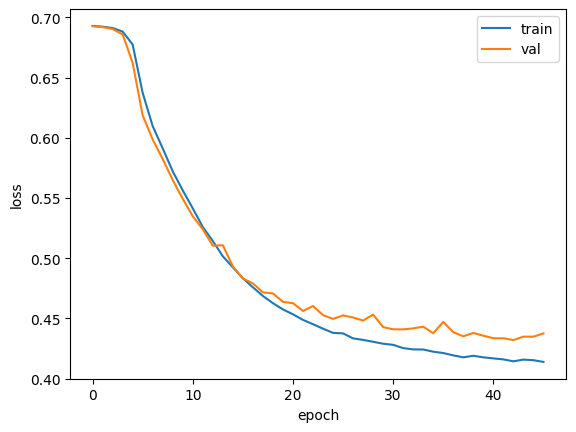

In [8]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()

In [16]:
model3=keras.Sequential()

model3.add(keras.layers.Embedding(500,16,input_length=100))
model3.add(keras.layers.LSTM(8,dropout=0.3,return_sequences=True))
model3.add(keras.layers.LSTM(8,dropout=0.3))
model3.add(keras.layers.Dense(1,activation='sigmoid'))

model3.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_4 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_4 (LSTM)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_5 (LSTM)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [17]:
from IPython.utils.terminal import restore_term_title
rmsprop=keras.optimizers.RMSprop(learning_rate=1e-4)
model3.compile(optimizer=rmsprop,loss='binary_crossentropy',
               metrics=['accuracy'])
checkpoint_cb=keras.callbacks.ModelCheckpoint('best-2rnn-model.h5')
early_stopping_cb=keras.callbacks.EarlyStopping(patience=3,
                                                restore_best_weights=True)
history=model3.fit(train_seq,train_target,epochs=100,batch_size=64,
                   validation_data=(val_seq,val_target),
                   callbacks=[checkpoint_cb,early_stopping_cb])

Epoch 1/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step - accuracy: 0.5067 - loss: 0.6929

313/313 ━━━━━━━━━━━━━━━━━━━━ 29s 79ms/step - accuracy: 0.5067 - loss: 0.6929 - val_accuracy: 0.5750 - val_loss: 0.6918
Epoch 2/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - accuracy: 0.5574 - loss: 0.6912

313/313 ━━━━━━━━━━━━━━━━━━━━ 24s 76ms/step - accuracy: 0.5574 - loss: 0.6912 - val_accuracy: 0.6288 - val_loss: 0.6881
Epoch 3/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step - accuracy: 0.6107 - loss: 0.6854

313/313 ━━━━━━━━━━━━━━━━━━━━ 25s 80ms/step - accuracy: 0.6107 - loss: 0.6853 - val_accuracy: 0.6846 - val_loss: 0.6669
Epoch 4/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step - accuracy: 0.6738 - loss: 0.6498

313/313 ━━━━━━━━━━━━━━━━━━━━ 24s 76ms/step - accuracy: 0.6738 - loss: 0.6498 - val_accuracy: 0.7132 - val_loss: 0.5875
Epoch 5/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step - accuracy: 0.7034 - loss: 0.5877

313/313 ━━━━━━━━━━━━━━━━━━━━ 24s 78ms/step - accuracy: 0.7034 - loss: 0.5877 - val_accuracy: 0.7352 - val_loss: 0.5537
Epoch 6/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step - accuracy: 0.7315 - loss: 0.5510

313/313 ━━━━━━━━━━━━━━━━━━━━ 41s 78ms/step - accuracy: 0.7315 - loss: 0.5510 - val_accuracy: 0.7468 - val_loss: 0.5276
Epoch 7/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step - accuracy: 0.7452 - loss: 0.5305

313/313 ━━━━━━━━━━━━━━━━━━━━ 41s 79ms/step - accuracy: 0.7452 - loss: 0.5305 - val_accuracy: 0.7432 - val_loss: 0.5241
Epoch 8/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step - accuracy: 0.7533 - loss: 0.5155

313/313 ━━━━━━━━━━━━━━━━━━━━ 26s 82ms/step - accuracy: 0.7533 - loss: 0.5155 - val_accuracy: 0.7606 - val_loss: 0.5042
Epoch 9/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step - accuracy: 0.7626 - loss: 0.5027

313/313 ━━━━━━━━━━━━━━━━━━━━ 25s 79ms/step - accuracy: 0.7626 - loss: 0.5026 - val_accuracy: 0.7654 - val_loss: 0.4936
Epoch 10/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step - accuracy: 0.7627 - loss: 0.4993

313/313 ━━━━━━━━━━━━━━━━━━━━ 41s 78ms/step - accuracy: 0.7627 - loss: 0.4993 - val_accuracy: 0.7710 - val_loss: 0.4798
Epoch 11/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - accuracy: 0.7775 - loss: 0.4804

313/313 ━━━━━━━━━━━━━━━━━━━━ 40s 75ms/step - accuracy: 0.7775 - loss: 0.4804 - val_accuracy: 0.7736 - val_loss: 0.4759
Epoch 12/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step - accuracy: 0.7842 - loss: 0.4733

313/313 ━━━━━━━━━━━━━━━━━━━━ 25s 81ms/step - accuracy: 0.7842 - loss: 0.4733 - val_accuracy: 0.7772 - val_loss: 0.4742
Epoch 13/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - accuracy: 0.7850 - loss: 0.4704

313/313 ━━━━━━━━━━━━━━━━━━━━ 40s 79ms/step - accuracy: 0.7850 - loss: 0.4704 - val_accuracy: 0.7816 - val_loss: 0.4646
Epoch 14/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - accuracy: 0.7819 - loss: 0.4710

313/313 ━━━━━━━━━━━━━━━━━━━━ 25s 79ms/step - accuracy: 0.7819 - loss: 0.4710 - val_accuracy: 0.7732 - val_loss: 0.4762
Epoch 15/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - accuracy: 0.7912 - loss: 0.4591

313/313 ━━━━━━━━━━━━━━━━━━━━ 25s 79ms/step - accuracy: 0.7912 - loss: 0.4592 - val_accuracy: 0.7728 - val_loss: 0.4755
Epoch 16/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step - accuracy: 0.7873 - loss: 0.4610

313/313 ━━━━━━━━━━━━━━━━━━━━ 25s 79ms/step - accuracy: 0.7873 - loss: 0.4610 - val_accuracy: 0.7790 - val_loss: 0.4687


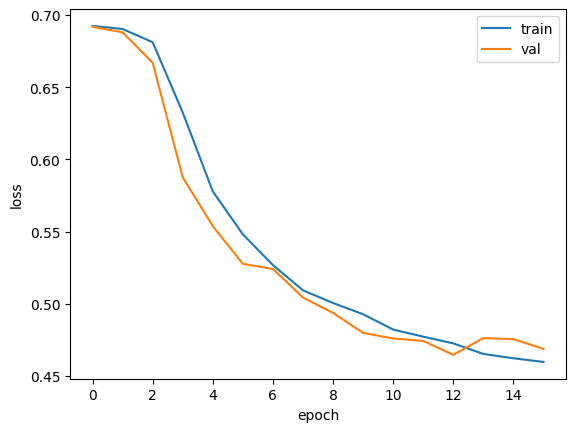

In [18]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()

In [9]:
model4=keras.Sequential()
model4.add(keras.layers.Embedding(500,16,input_length=100))
model4.add(keras.layers.GRU(8))
model4.add(keras.layers.Dense(1,activation='sigmoid'))

model4.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_3 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru (GRU)                       │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [11]:
rmsprop=keras.optimizers.RMSprop(learning_rate=1e-4)
model4.compile(optimizer=rmsprop,loss='binary_crossentropy',
               metrics=['accuracy'])
checkpoint_cb=keras.callbacks.ModelCheckpoint('best-gru-model.h5')
early_stopping_cb=keras.callbacks.EarlyStopping(patience=3,
                                                restore_best_weights=True)
history=model4.fit(train_seq,train_target,epochs=100,batch_size=64,
                   validation_data=(val_seq,val_target),
                   callbacks=[checkpoint_cb,early_stopping_cb])

Epoch 1/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - accuracy: 0.5197 - loss: 0.6927

313/313 ━━━━━━━━━━━━━━━━━━━━ 20s 57ms/step - accuracy: 0.5198 - loss: 0.6927 - val_accuracy: 0.5294 - val_loss: 0.6919
Epoch 2/100
312/313 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - accuracy: 0.5498 - loss: 0.6910

313/313 ━━━━━━━━━━━━━━━━━━━━ 16s 52ms/step - accuracy: 0.5498 - loss: 0.6910 - val_accuracy: 0.5550 - val_loss: 0.6900
Epoch 3/100
312/313 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - accuracy: 0.5705 - loss: 0.6889

313/313 ━━━━━━━━━━━━━━━━━━━━ 16s 51ms/step - accuracy: 0.5705 - loss: 0.6889 - val_accuracy: 0.5762 - val_loss: 0.6871
Epoch 4/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 0.5950 - loss: 0.6851

313/313 ━━━━━━━━━━━━━━━━━━━━ 21s 53ms/step - accuracy: 0.5950 - loss: 0.6851 - val_accuracy: 0.5880 - val_loss: 0.6829
Epoch 5/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - accuracy: 0.6034 - loss: 0.6799

313/313 ━━━━━━━━━━━━━━━━━━━━ 16s 51ms/step - accuracy: 0.6034 - loss: 0.6799 - val_accuracy: 0.5982 - val_loss: 0.6765
Epoch 6/100
312/313 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 0.6171 - loss: 0.6730

313/313 ━━━━━━━━━━━━━━━━━━━━ 16s 52ms/step - accuracy: 0.6171 - loss: 0.6729 - val_accuracy: 0.6204 - val_loss: 0.6670
Epoch 7/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - accuracy: 0.6326 - loss: 0.6623

313/313 ━━━━━━━━━━━━━━━━━━━━ 20s 51ms/step - accuracy: 0.6327 - loss: 0.6623 - val_accuracy: 0.6336 - val_loss: 0.6525
Epoch 8/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - accuracy: 0.6476 - loss: 0.6453

313/313 ━━━━━━━━━━━━━━━━━━━━ 16s 51ms/step - accuracy: 0.6477 - loss: 0.6453 - val_accuracy: 0.6618 - val_loss: 0.6308
Epoch 9/100
312/313 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - accuracy: 0.6755 - loss: 0.6162

313/313 ━━━━━━━━━━━━━━━━━━━━ 20s 51ms/step - accuracy: 0.6755 - loss: 0.6161 - val_accuracy: 0.6940 - val_loss: 0.5957
Epoch 10/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 0.7106 - loss: 0.5693

313/313 ━━━━━━━━━━━━━━━━━━━━ 16s 51ms/step - accuracy: 0.7106 - loss: 0.5693 - val_accuracy: 0.7392 - val_loss: 0.5322
Epoch 11/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 0.7531 - loss: 0.5089

313/313 ━━━━━━━━━━━━━━━━━━━━ 21s 52ms/step - accuracy: 0.7531 - loss: 0.5089 - val_accuracy: 0.7514 - val_loss: 0.5066
Epoch 12/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - accuracy: 0.7644 - loss: 0.4952

313/313 ━━━━━━━━━━━━━━━━━━━━ 21s 55ms/step - accuracy: 0.7645 - loss: 0.4952 - val_accuracy: 0.7644 - val_loss: 0.4913
Epoch 13/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 0.7785 - loss: 0.4810

313/313 ━━━━━━━━━━━━━━━━━━━━ 16s 51ms/step - accuracy: 0.7785 - loss: 0.4810 - val_accuracy: 0.7740 - val_loss: 0.4802
Epoch 14/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - accuracy: 0.7838 - loss: 0.4664

313/313 ━━━━━━━━━━━━━━━━━━━━ 21s 53ms/step - accuracy: 0.7839 - loss: 0.4664 - val_accuracy: 0.7636 - val_loss: 0.4873
Epoch 15/100
312/313 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - accuracy: 0.7951 - loss: 0.4530

313/313 ━━━━━━━━━━━━━━━━━━━━ 16s 52ms/step - accuracy: 0.7951 - loss: 0.4530 - val_accuracy: 0.7804 - val_loss: 0.4701
Epoch 16/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - accuracy: 0.7974 - loss: 0.4488

313/313 ━━━━━━━━━━━━━━━━━━━━ 21s 53ms/step - accuracy: 0.7974 - loss: 0.4488 - val_accuracy: 0.7826 - val_loss: 0.4621
Epoch 17/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - accuracy: 0.7982 - loss: 0.4459

313/313 ━━━━━━━━━━━━━━━━━━━━ 17s 53ms/step - accuracy: 0.7982 - loss: 0.4459 - val_accuracy: 0.7836 - val_loss: 0.4629
Epoch 18/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - accuracy: 0.8041 - loss: 0.4400

313/313 ━━━━━━━━━━━━━━━━━━━━ 20s 53ms/step - accuracy: 0.8041 - loss: 0.4400 - val_accuracy: 0.7862 - val_loss: 0.4612
Epoch 19/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - accuracy: 0.8047 - loss: 0.4380

313/313 ━━━━━━━━━━━━━━━━━━━━ 18s 57ms/step - accuracy: 0.8047 - loss: 0.4380 - val_accuracy: 0.7830 - val_loss: 0.4611
Epoch 20/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - accuracy: 0.8022 - loss: 0.4411

313/313 ━━━━━━━━━━━━━━━━━━━━ 19s 53ms/step - accuracy: 0.8022 - loss: 0.4411 - val_accuracy: 0.7858 - val_loss: 0.4538
Epoch 21/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 0.8082 - loss: 0.4315

313/313 ━━━━━━━━━━━━━━━━━━━━ 17s 53ms/step - accuracy: 0.8082 - loss: 0.4315 - val_accuracy: 0.7916 - val_loss: 0.4527
Epoch 22/100
312/313 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - accuracy: 0.8066 - loss: 0.4345

313/313 ━━━━━━━━━━━━━━━━━━━━ 17s 56ms/step - accuracy: 0.8066 - loss: 0.4345 - val_accuracy: 0.7928 - val_loss: 0.4501
Epoch 23/100
312/313 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - accuracy: 0.8109 - loss: 0.4304

313/313 ━━━━━━━━━━━━━━━━━━━━ 19s 51ms/step - accuracy: 0.8109 - loss: 0.4304 - val_accuracy: 0.7866 - val_loss: 0.4551
Epoch 24/100
312/313 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - accuracy: 0.8064 - loss: 0.4330

313/313 ━━━━━━━━━━━━━━━━━━━━ 21s 53ms/step - accuracy: 0.8065 - loss: 0.4330 - val_accuracy: 0.7892 - val_loss: 0.4561
Epoch 25/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - accuracy: 0.8088 - loss: 0.4231

313/313 ━━━━━━━━━━━━━━━━━━━━ 16s 51ms/step - accuracy: 0.8088 - loss: 0.4231 - val_accuracy: 0.7922 - val_loss: 0.4504


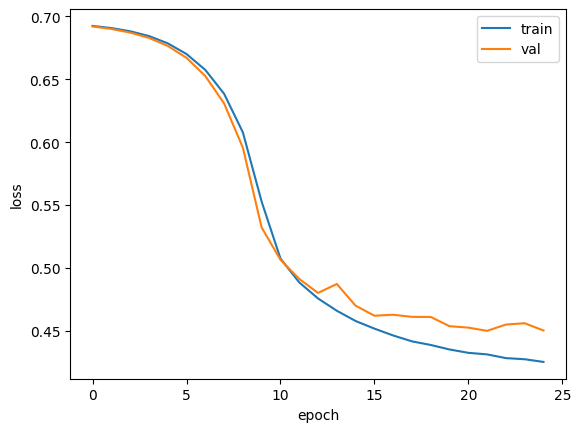

In [12]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()